In [1]:
from cheftgp.eft import *
from cheftgp.gaussianprocess import *
from cheftgp.graphs import *
from cheftgp.scattering import *
from cheftgp.utils import *
from scripts.generator_fns import *
import scipy

# Plot four-panel figures of total cross section coefficients

In [2]:
# sets colors
cmaps = [plt.get_cmap(name) for name in ['Oranges', 'Greens', 'Blues', 'Reds', 'Purples']]
colors = [cmap(0.55 - 0.1 * (i==0)) for i, cmap in enumerate(cmaps)]

In [3]:
# gets data for potential
pot = 'RKE_L-500MeV'
    
def get_data(observable_string):
    file_name = 'scattering_observables_RKE_L-500MeV.h5'
    dir_path = '../observables_data/'
    full_path = dir_path + file_name
    response = h5py.File(full_path, "r")
    obs_data = np.array(response[observable_string][:])
    response.close()
    return obs_data

SGT = get_data('SGT').T
DSG = get_data('DSG')
AY = get_data('PB')
A = get_data('A')
D = get_data('D')
AXX = get_data('AXX')
AYY = get_data('AYY')
t_lab = get_data('t_lab')
degrees = get_data('degrees')

# sets orders
if pot[:3] == 'RKE':
    orders = np.array([0, 2, 3, 4, 5, 6])
else:
    orders = np.array([0, 2, 3, 4, 5])

# calculates relative momentum from lab energy
p_rel = E_to_p(t_lab, interaction = 'np')

#### $m_{\mathrm{eff}} = 138\,\mathrm{MeV}$, $\Lambda_{b} = 600\,\mathrm{MeV}$

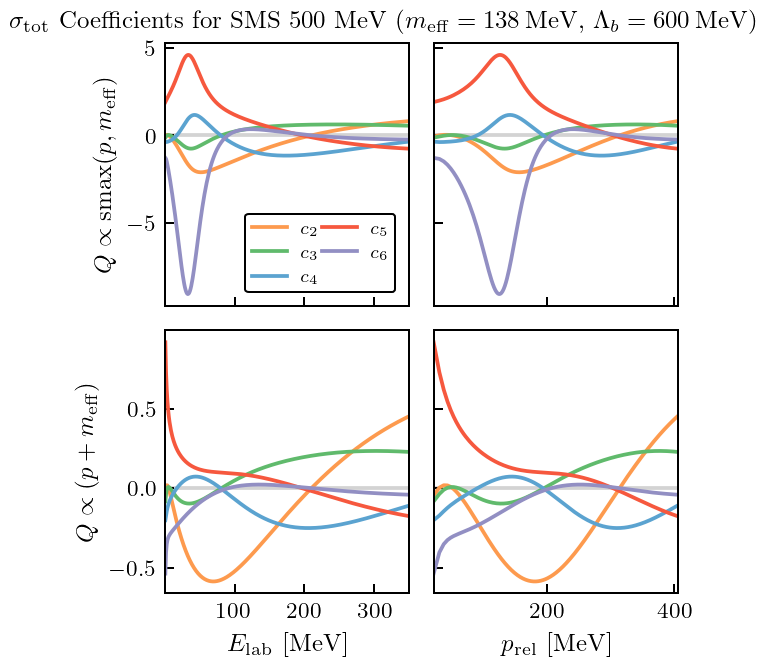

In [4]:
# sets breakdown and soft scales 
breakdown = 600
mpi = 138

# evaluates ratios
Q_max_p = Q_approx(p_rel, "smax", breakdown, m_pi = mpi)
Q_max_E = Q_approx(p_rel, "smax", breakdown, m_pi = mpi)
Q_s_p = Q_approx(p_rel, "rawsum", breakdown, m_pi = mpi)
Q_s_E = Q_approx(p_rel, "rawsum", breakdown, m_pi = mpi)
Q_list = [Q_max_E, Q_max_p, Q_s_E, Q_s_p]

# evaluates coefficients
coeffs_sgt_max_p = gm.coefficients(SGT, ratio=Q_max_p, ref=SGT[:, 0], orders=orders)[:, 1:]
coeffs_sgt_max_E = gm.coefficients(SGT, ratio=Q_max_E, ref=SGT[:, 0], orders=orders)[:, 1:]
coeffs_sgt_sum_p = gm.coefficients(SGT, ratio=Q_s_p, ref=SGT[:, 0], orders=orders)[:, 1:]
coeffs_sgt_sum_E = gm.coefficients(SGT, ratio=Q_s_E, ref=SGT[:, 0], orders=orders)[:, 1:]

coeffs_sgt = np.array([gm.coefficients(SGT, ratio=Q, ref=SGT[:, 0], orders=orders)[:, 1:] for Q in Q_list])

# plots
fig, axes = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(3.7,3.7))

for i, coeff in enumerate(np.swapaxes(np.swapaxes(coeffs_sgt, 0, 2), 1, 2)):
    axes[0, 0].plot(t_lab, coeff[0], color=colors[i], label=f'$c_{orders[i+1]}$')
    axes[1, 0].plot(t_lab, coeff[2], color=colors[i], label=f'$c_{orders[i+1]}$')
    axes[0, 1].plot(p_rel, coeff[1], color=colors[i], label=f'$c_{orders[i+1]}$')
    axes[1, 1].plot(p_rel, coeff[3], color=colors[i], label=f'$c_{orders[i+1]}$')

for ax in axes.ravel():
    ax.axhline(0, 0, 1, color='lightgrey', zorder=-1)
axes[0, 0].legend(loc = "lower right", fontsize = 7, ncol = 2, columnspacing = 0.2)
axes[1, 0].set_xlabel(r'$E_{\rm lab}$ [MeV]', fontsize = 10)
axes[1, 1].set_xlabel(r'$p_{\rm rel}$ [MeV]', fontsize = 10)
axes[0, 0].set_ylabel(f'$Q \propto \mathrm{{smax}}(p, m_{{\mathrm{{eff}}}})$', fontsize = 10)
axes[1, 0].set_ylabel(f'$Q \propto (p + m_{{\mathrm{{eff}}}})$', fontsize = 10)
fig.tight_layout()
fig.suptitle(fr'$\sigma_{{\mathrm{{tot}}}}$ Coefficients for SMS 500 MeV ($m_{{\mathrm{{eff}}}} = 138\,\mathrm{{MeV}}$, $\Lambda_{{b}} = 600\,\mathrm{{MeV}}$)', y=1.01, fontsize = 10)
# saves
fig.savefig(f'sgt_coeff_assumption_grid_{pot}_mpi{mpi}.png')

#### $m_{\mathrm{eff}} = 200\,\mathrm{MeV}$, $\Lambda_{b} = 600\,\mathrm{MeV}$

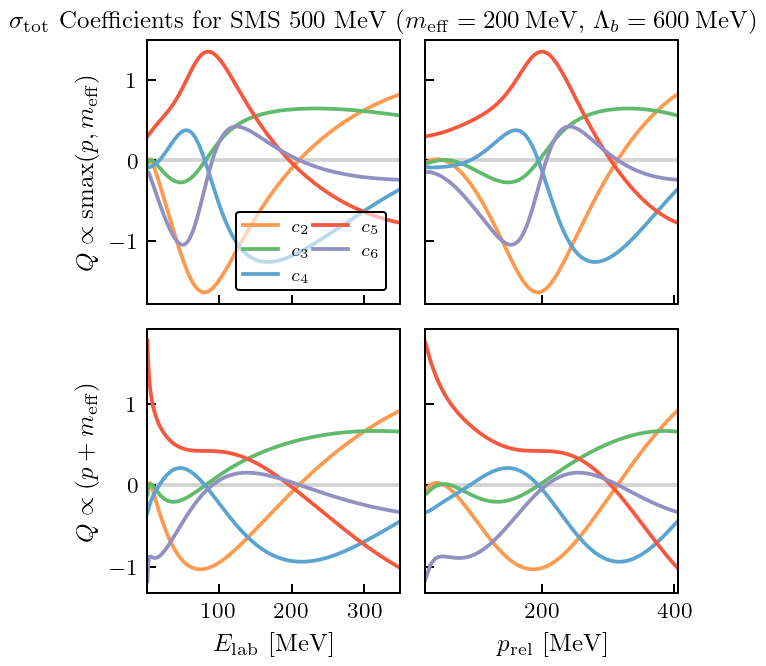

In [5]:
# sets breakdown and soft scales 
breakdown = 600
mpi = 200

# evaluates ratios
Q_max_p = Q_approx(p_rel, "smax", breakdown, m_pi = mpi)
Q_max_E = Q_approx(p_rel, "smax", breakdown, m_pi = mpi)
Q_s_p = Q_approx(p_rel, "sum", breakdown, m_pi = mpi)
Q_s_E = Q_approx(p_rel, "sum", breakdown, m_pi = mpi)
Q_list = [Q_max_E, Q_max_p, Q_s_E, Q_s_p]

# evaluates coefficients
coeffs_sgt_max_p = gm.coefficients(SGT, ratio=Q_max_p, ref=SGT[:, 0], orders=orders)[:, 1:]
coeffs_sgt_max_E = gm.coefficients(SGT, ratio=Q_max_E, ref=SGT[:, 0], orders=orders)[:, 1:]
coeffs_sgt_sum_p = gm.coefficients(SGT, ratio=Q_s_p, ref=SGT[:, 0], orders=orders)[:, 1:]
coeffs_sgt_sum_E = gm.coefficients(SGT, ratio=Q_s_E, ref=SGT[:, 0], orders=orders)[:, 1:]

coeffs_sgt = np.array([gm.coefficients(SGT, ratio=Q, ref=SGT[:, 0], orders=orders)[:, 1:] for Q in Q_list])

# plots
fig, axes = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(3.7,3.7))

for i, coeff in enumerate(np.swapaxes(np.swapaxes(coeffs_sgt, 0, 2), 1, 2)):
    axes[0, 0].plot(t_lab, coeff[0], color=colors[i], label=f'$c_{orders[i+1]}$')
    axes[1, 0].plot(t_lab, coeff[2], color=colors[i], label=f'$c_{orders[i+1]}$')
    axes[0, 1].plot(p_rel, coeff[1], color=colors[i], label=f'$c_{orders[i+1]}$')
    axes[1, 1].plot(p_rel, coeff[3], color=colors[i], label=f'$c_{orders[i+1]}$')

for ax in axes.ravel():
    ax.axhline(0, 0, 1, color='lightgrey', zorder=-1)
axes[0, 0].legend(loc = "lower right", fontsize = 7, ncol = 2, columnspacing = 0.2)
axes[1, 0].set_xlabel(r'$E_{\rm lab}$ [MeV]', fontsize = 10)
axes[1, 1].set_xlabel(r'$p_{\rm rel}$ [MeV]', fontsize = 10)
axes[0, 0].set_ylabel(f'$Q \propto \mathrm{{smax}}(p, m_{{\mathrm{{eff}}}})$', fontsize = 10)
axes[1, 0].set_ylabel(f'$Q \propto (p + m_{{\mathrm{{eff}}}})$', fontsize = 10)
fig.tight_layout()
fig.suptitle(fr'$\sigma_{{\mathrm{{tot}}}}$ Coefficients for SMS 500 MeV ($m_{{\mathrm{{eff}}}} = 200\,\mathrm{{MeV}}$, $\Lambda_{{b}} = 600\,\mathrm{{MeV}}$)', y=1.01, fontsize = 10)
# saves
fig.savefig(f'sgt_coeff_assumption_grid_{pot}_mpi{mpi}.png')

#### $m_{\mathrm{eff}}$ and $\Lambda_{b}$ set to optimal values (see code)

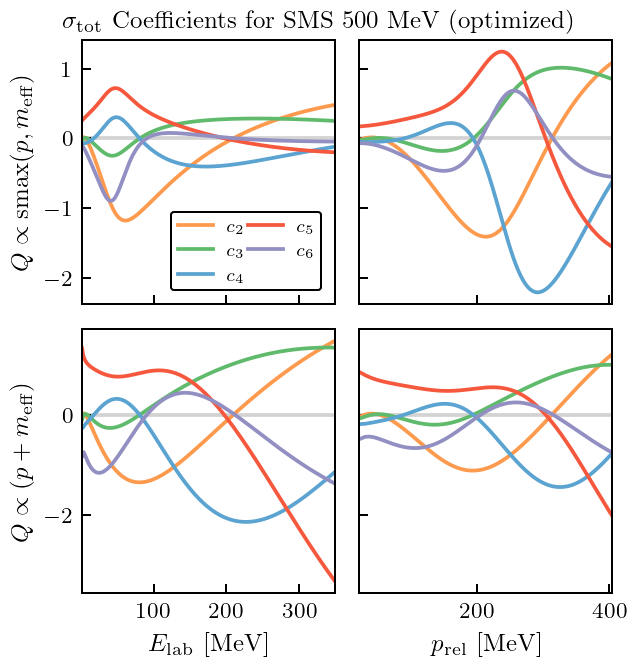

In [9]:
# evaluates ratios with optimal values of breakdown and soft scale for each combination of 
# Q parametrization and input space
# Q_max_E = Q_approx(p_rel, "smax", 460, m_pi = 158)
# Q_max_p = Q_approx(p_rel, "smax", 377, m_pi = 106)
# Q_s_E = Q_approx(p_rel, "sum", 517, m_pi = 189)
# Q_s_p = Q_approx(p_rel, "sum", 477, m_pi = 141)
# Q_list = [Q_max_E, Q_max_p, Q_s_E, Q_s_p]
Q_max_E = Q_approx(p_rel, "smax", 460, m_pi = 158)
Q_max_p = Q_approx(p_rel, "smax", 683, m_pi = 255)
Q_s_E = Q_approx(p_rel, "sum", 819, m_pi = 350)
Q_s_p = Q_approx(p_rel, "sum", 739, m_pi = 342)
Q_list = [Q_max_E, Q_max_p, Q_s_E, Q_s_p]

# evaluates coefficients
coeffs_sgt_max_p = gm.coefficients(SGT, ratio=Q_max_p, ref=SGT[:, 0], orders=orders)[:, 1:]
coeffs_sgt_max_E = gm.coefficients(SGT, ratio=Q_max_E, ref=SGT[:, 0], orders=orders)[:, 1:]
coeffs_sgt_sum_p = gm.coefficients(SGT, ratio=Q_s_p, ref=SGT[:, 0], orders=orders)[:, 1:]
coeffs_sgt_sum_E = gm.coefficients(SGT, ratio=Q_s_E, ref=SGT[:, 0], orders=orders)[:, 1:]

coeffs_sgt = np.array([gm.coefficients(SGT, ratio=Q, ref=SGT[:, 0], orders=orders)[:, 1:] for Q in Q_list])

# plots
fig, axes = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(3.7,3.7))

for i, coeff in enumerate(np.swapaxes(np.swapaxes(coeffs_sgt, 0, 2), 1, 2)):
    axes[0, 0].plot(t_lab, coeff[0], color=colors[i], label=f'$c_{orders[i+1]}$')
    axes[1, 0].plot(t_lab, coeff[2], color=colors[i], label=f'$c_{orders[i+1]}$')
    axes[0, 1].plot(p_rel, coeff[1], color=colors[i], label=f'$c_{orders[i+1]}$')
    axes[1, 1].plot(p_rel, coeff[3], color=colors[i], label=f'$c_{orders[i+1]}$')

for ax in axes.ravel():
    ax.axhline(0, 0, 1, color='lightgrey', zorder=-1)
axes[0, 0].legend(loc = "lower right", fontsize = 7, ncol = 2, columnspacing = 0.2)
axes[1, 0].set_xlabel(r'$E_{\rm lab}$ [MeV]', fontsize = 10)
axes[1, 1].set_xlabel(r'$p_{\rm rel}$ [MeV]', fontsize = 10)
axes[0, 0].set_ylabel(f'$Q \propto \mathrm{{smax}}(p, m_{{\mathrm{{eff}}}})$', fontsize = 10)
axes[1, 0].set_ylabel(f'$Q \propto (p + m_{{\mathrm{{eff}}}})$', fontsize = 10)
fig.tight_layout()
fig.suptitle(fr'$\sigma_{{\mathrm{{tot}}}}$ Coefficients for SMS 500 MeV (optimized)', y=1.01, fontsize = 10)
# saves
fig.savefig(f'sgt_coeff_assumption_grid_{pot}_mpiopt.png')

## Plot for all $Q$ prescriptions against $p_{\rm rel}$

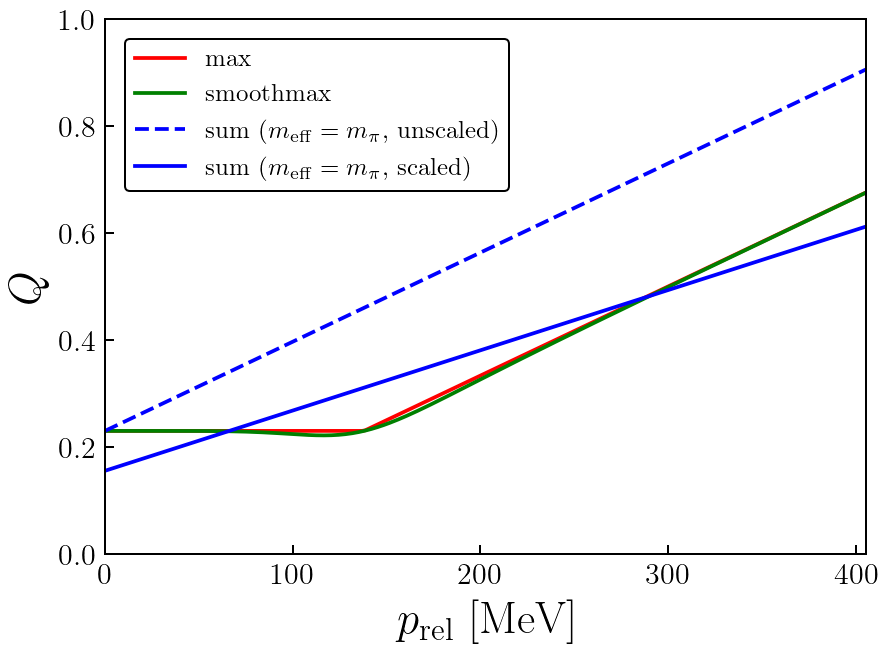

In [7]:
Elab_array = np.linspace(0, 350, 351)

fig, ax = plt.subplots(figsize = (5.1, 3.8))

Lambdab = 600

ax.plot(E_to_p(Elab_array, 'np'), Q_approx(E_to_p(Elab_array, "np"), "max", Lambda_b=Lambdab, m_pi = 138), 
        c = 'red', label = "max")
ax.plot(E_to_p(Elab_array, 'np'), Q_approx(E_to_p(Elab_array, "np"), "smax", Lambda_b=Lambdab, m_pi = 138), 
        c = 'green', label = "smoothmax")
ax.plot(E_to_p(Elab_array, 'np'), Q_approx(E_to_p(Elab_array, "np"), "rawsum", Lambda_b=Lambdab, m_pi = 138), 
        c = 'blue', label = r'sum ($m_{\mathrm{eff}} = m_{\pi}$, unscaled)', ls='--')
ax.plot(E_to_p(Elab_array, 'np'), Q_approx(E_to_p(Elab_array, "np"), "sum", Lambda_b=Lambdab, m_pi = 138), 
        c = 'blue', label = r'sum ($m_{\mathrm{eff}} = m_{\pi}$, scaled)')

axis_font = {'size':'18'}
ax.set_xlabel(r'$p_{\mathrm{rel}}$ [MeV]', **axis_font)
ax.set_ylabel(r'$Q$', **axis_font)
ax.set_ylim(0, 1)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend(loc = 'upper left', prop={'size': 10}, ncol = 1, columnspacing = 0.2)
fig.tight_layout()
fig.savefig('figures/Qparamvsprel.png')

## Evaluates the ratio $Q_{\rm sum} / Q_{\rm smax}$ over the relevant range in momentum and compares to a linear fit function

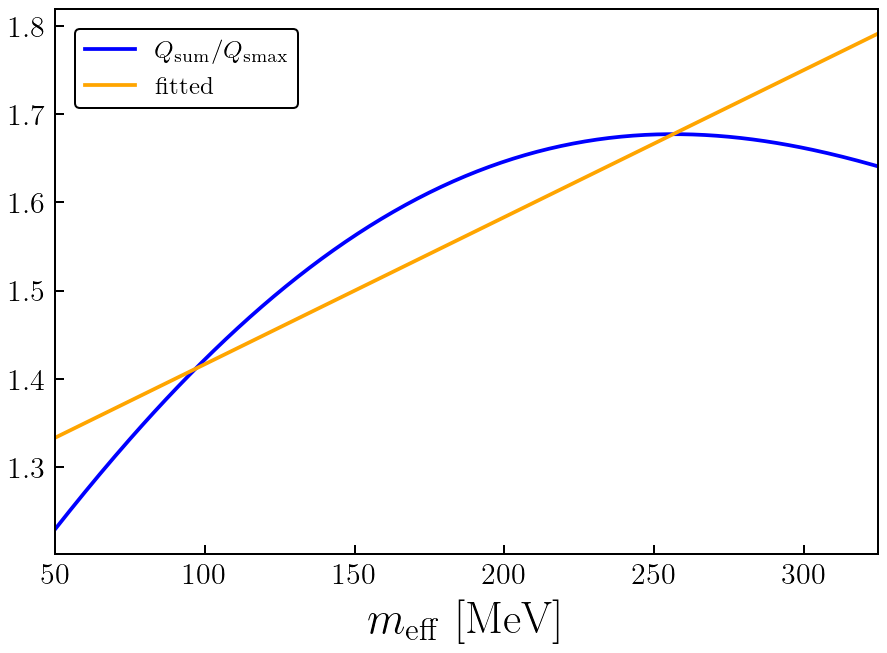

In [8]:
def Qcomparison(prel, Lambda_b, mpi):
    return scipy.integrate.trapz(
            Q_approx(prel, "rawsum", 
                Lambda_b, 
                m_pi = mpi, 
                single_expansion = False), prel) / \
        scipy.integrate.trapz(
            Q_approx(prel, "smax", 
                Lambda_b, 
                m_pi = mpi, 
                single_expansion = False), prel)
            

Elab_array = np.linspace(1, 350, 350)
prel_array = E_to_p(Elab_array, 'np')
mpi_array = np.linspace(50, 325, 276)

fig, ax = plt.subplots(figsize = (5.1, 3.8))

Lambdab = 600

ax.plot(mpi_array, [Qcomparison(prel_array, Lambdab, m) for m in mpi_array], 
        c = 'blue', label = r'$Q_{\mathrm{sum}}/Q_{\mathrm{smax}}$')
ax.plot(mpi_array, Qsum_to_Qsmoothmax(mpi_array), 
        c = 'orange', label = 'fitted')

axis_font = {'size':'18'}
ax.set_xlabel(r'$m_{\mathrm{eff}}$ [MeV]', **axis_font)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend(loc = 'upper left', prop={'size': 10}, ncol = 1, columnspacing = 0.2)
fig.tight_layout()
fig.savefig('figures/QsumQsmax.png')

## Plots graphical and statistical diagnostics for all figures in the paper

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:664: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  optima = np.array(optima)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


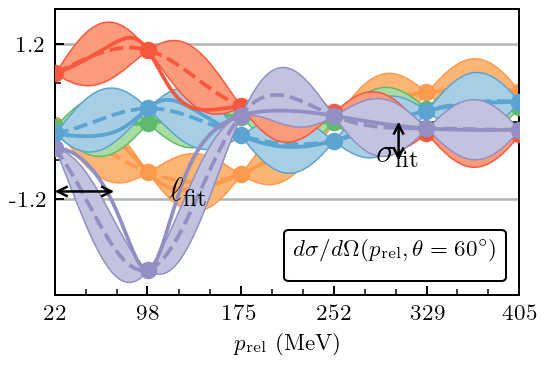

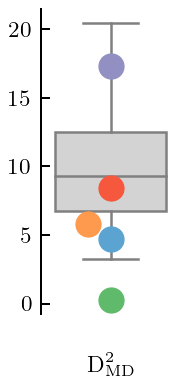

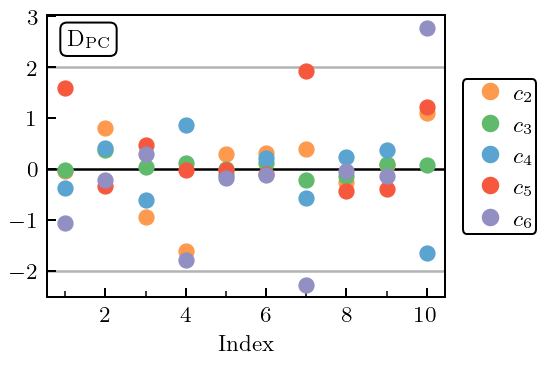

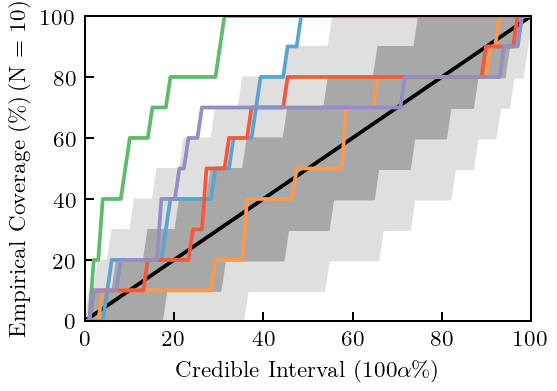

In [9]:
generate_diagnostics(
    nn_interaction="np",
    scale_scheme_bunch_array=[RKE500MeV],
    observable_input=["DSG"],
    E_input_array=[],
    deg_input_array=[60],
    Q_param_method_array=["smax"],
    p_param_method_array=["Qofprel"],
    input_space_input=["prel"],
    train_test_split_array=[Allenergysplit1],
    orders_excluded=[],
    orders_names_dict=None,
    orders_labels_dict=None,
    # length_scale_input=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleTlabInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleDegInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    fixed_sd=None,
    m_pi_eff=106,
    Lambdab=377,
    print_all_classes=False,
    savefile_type="png",
    plot_coeffs_bool=True,
    plot_md_bool=True,
    plot_pc_bool=True,
    plot_ci_bool=True,
    plot_pdf_bool=False,
    plot_trunc_bool=False,
    plot_plotzilla_bool=False,
    save_coeffs_bool=True,
    save_md_bool=True,
    save_pc_bool=True,
    save_ci_bool=True,
    save_pdf_bool=False,
    save_trunc_bool=False,
    save_plotzilla_bool=False,
    filename_addendum="_paper_0",
)

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:664: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  optima = np.array(optima)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


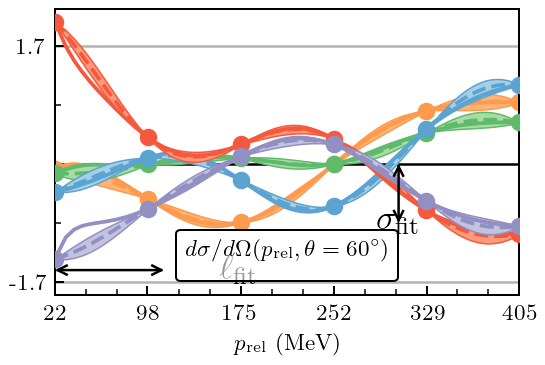

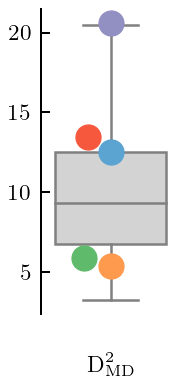

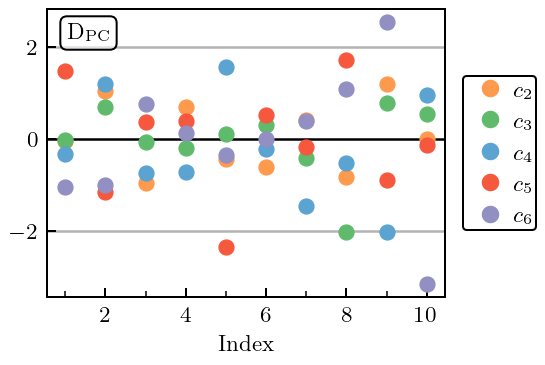

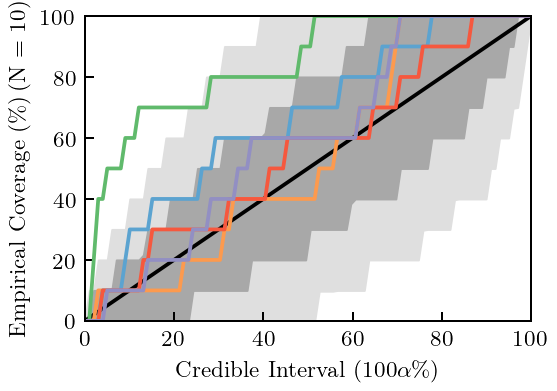

In [10]:
generate_diagnostics(
    nn_interaction="np",
    scale_scheme_bunch_array=[RKE500MeV],
    observable_input=["DSG"],
    E_input_array=[],
    deg_input_array=[60],
    Q_param_method_array=["sum"],
    p_param_method_array=["Qofprel"],
    input_space_input=["prel"],
    train_test_split_array=[Allenergysplit1],
    orders_excluded=[],
    orders_names_dict=None,
    orders_labels_dict=None,
    # length_scale_input=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleTlabInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleDegInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    fixed_sd=None,
    m_pi_eff=141,
    Lambdab=477,
    print_all_classes=False,
    savefile_type="png",
    plot_coeffs_bool=True,
    plot_md_bool=True,
    plot_pc_bool=True,
    plot_ci_bool=True,
    plot_pdf_bool=False,
    plot_trunc_bool=False,
    plot_plotzilla_bool=False,
    save_coeffs_bool=True,
    save_md_bool=True,
    save_pc_bool=True,
    save_ci_bool=True,
    save_pdf_bool=False,
    save_trunc_bool=False,
    save_plotzilla_bool=False,
    filename_addendum="_paper_0",
)

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:664: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  optima = np.array(optima)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


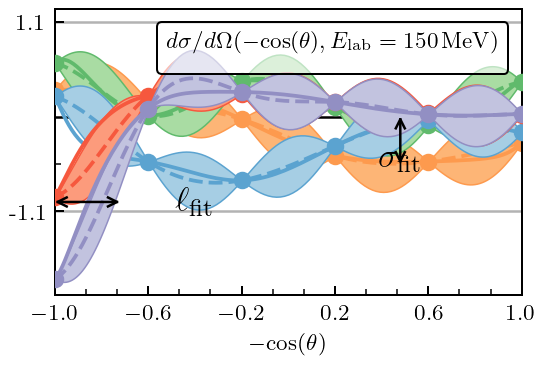

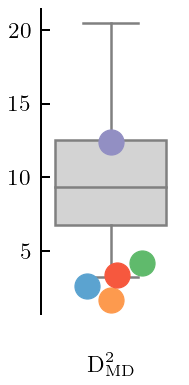

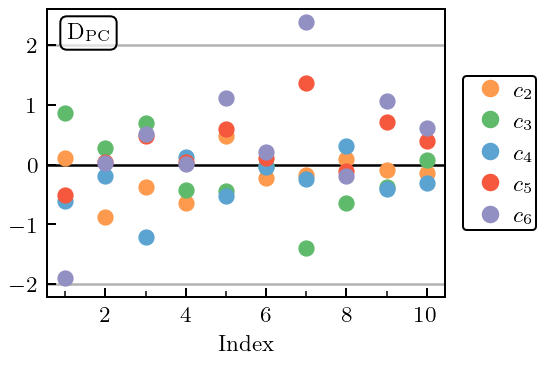

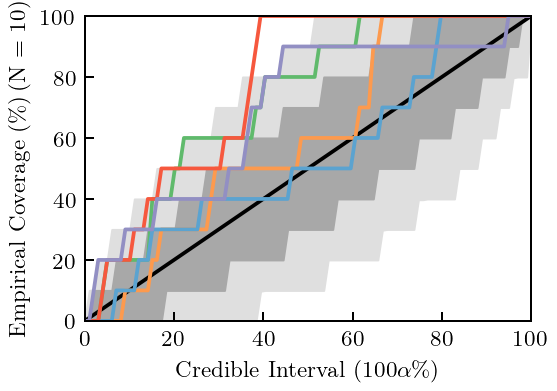

In [11]:
generate_diagnostics(
    nn_interaction="np",
    scale_scheme_bunch_array=[RKE500MeV],
    observable_input=["DSG"],
    E_input_array=[150],
    deg_input_array=[],
    Q_param_method_array=["sum"],
    p_param_method_array=["Qofpq"],
    input_space_input=["cos"],
    train_test_split_array=[Fullspaceanglessplit1],
    orders_excluded=[],
    orders_names_dict=None,
    orders_labels_dict=None,
    # length_scale_input=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleTlabInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleDegInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    fixed_sd=None,
    m_pi_eff=177,
    Lambdab=546,
    print_all_classes=False,
    savefile_type="png",
    plot_coeffs_bool=True,
    plot_md_bool=True,
    plot_pc_bool=True,
    plot_ci_bool=True,
    plot_pdf_bool=False,
    plot_trunc_bool=False,
    plot_plotzilla_bool=False,
    save_coeffs_bool=True,
    save_md_bool=True,
    save_pc_bool=True,
    save_ci_bool=True,
    save_pdf_bool=False,
    save_trunc_bool=False,
    save_plotzilla_bool=False,
    filename_addendum="_paper_0",
)

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:664: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  optima = np.array(optima)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


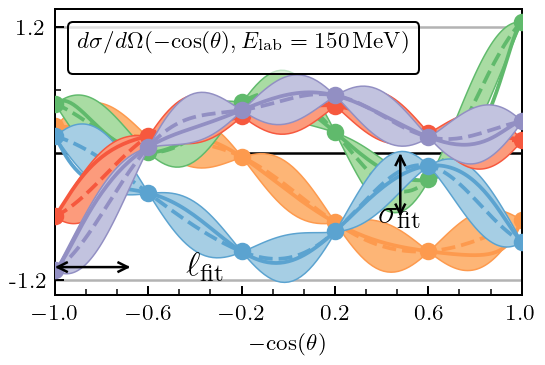

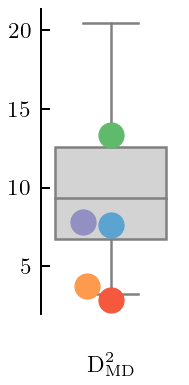

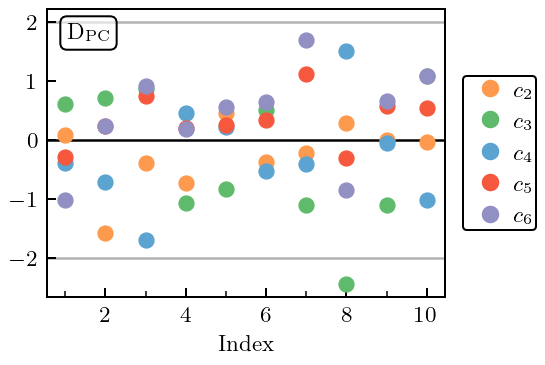

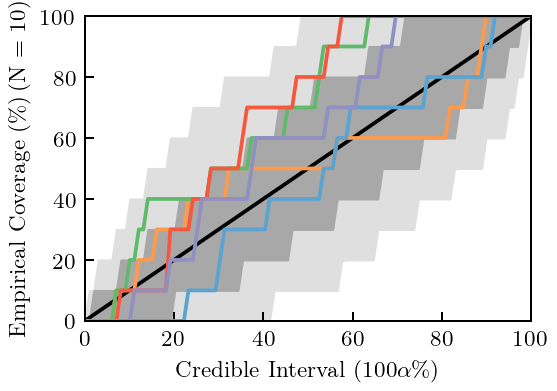

In [12]:
generate_diagnostics(
    nn_interaction="np",
    scale_scheme_bunch_array=[RKE500MeV],
    observable_input=["DSG"],
    E_input_array=[150],
    deg_input_array=[],
    Q_param_method_array=["sum"],
    p_param_method_array=["Qofprel"],
    input_space_input=["cos"],
    train_test_split_array=[Fullspaceanglessplit1],
    orders_excluded=[],
    orders_names_dict=None,
    orders_labels_dict=None,
    # length_scale_input=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleTlabInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleDegInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    fixed_sd=None,
    m_pi_eff=141,
    Lambdab=477,
    print_all_classes=False,
    savefile_type="png",
    plot_coeffs_bool=True,
    plot_md_bool=True,
    plot_pc_bool=True,
    plot_ci_bool=True,
    plot_pdf_bool=False,
    plot_trunc_bool=False,
    plot_plotzilla_bool=False,
    save_coeffs_bool=True,
    save_md_bool=True,
    save_pc_bool=True,
    save_ci_bool=True,
    save_pdf_bool=False,
    save_trunc_bool=False,
    save_plotzilla_bool=False,
    filename_addendum="_paper_0",
)

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:664: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  optima = np.array(optima)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


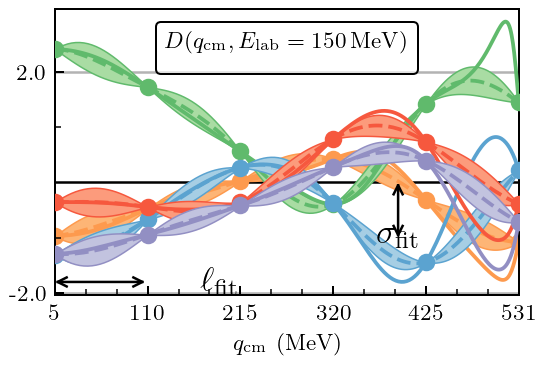

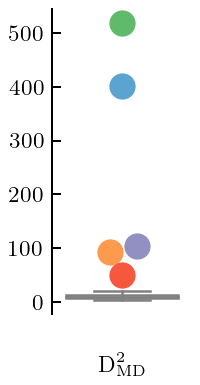

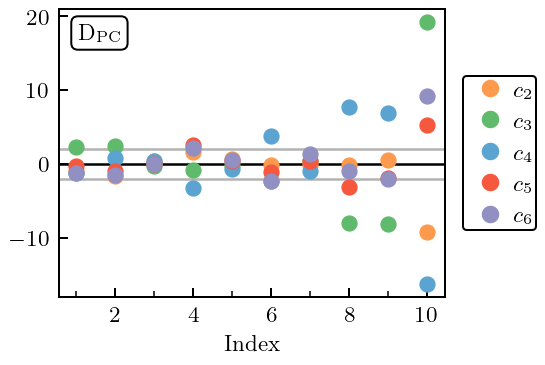

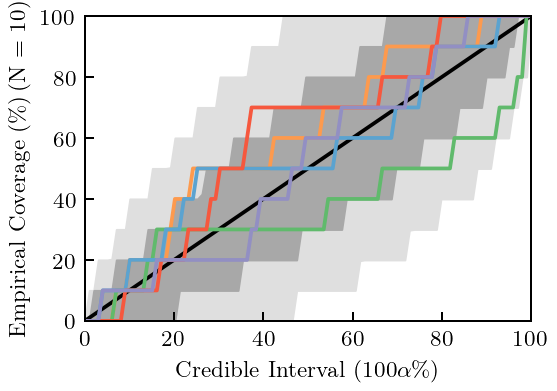

In [13]:
generate_diagnostics(
    nn_interaction="np",
    scale_scheme_bunch_array=[RKE500MeV],
    observable_input=["D"],
    E_input_array=[150],
    deg_input_array=[],
    Q_param_method_array=["sum"],
    p_param_method_array=["Qofprel"],
    input_space_input=["qcm"],
    train_test_split_array=[Fullspaceanglessplit1],
    orders_excluded=[],
    orders_names_dict=None,
    orders_labels_dict=None,
    # length_scale_input=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleTlabInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleDegInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    fixed_sd=None,
    m_pi_eff=183,
    Lambdab=540,
    print_all_classes=False,
    savefile_type="png",
    plot_coeffs_bool=True,
    plot_md_bool=True,
    plot_pc_bool=True,
    plot_ci_bool=True,
    plot_pdf_bool=False,
    plot_trunc_bool=False,
    plot_plotzilla_bool=False,
    save_coeffs_bool=True,
    save_md_bool=True,
    save_pc_bool=True,
    save_ci_bool=True,
    save_pdf_bool=False,
    save_trunc_bool=False,
    save_plotzilla_bool=False,
    filename_addendum="_paper_0",
)

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:664: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  optima = np.array(optima)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


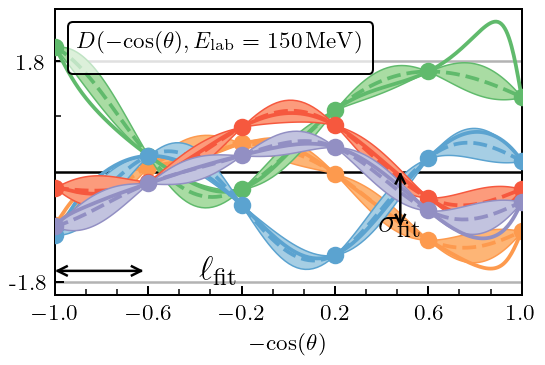

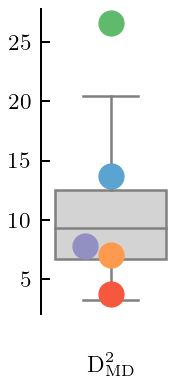

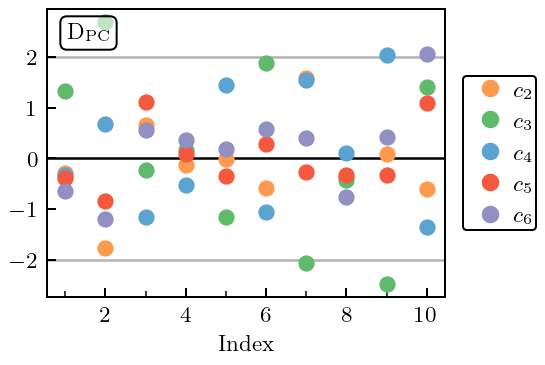

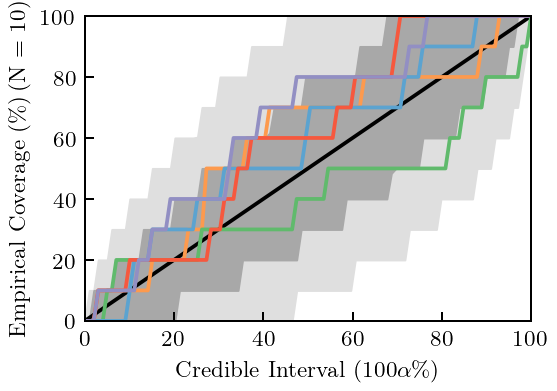

In [14]:
generate_diagnostics(
    nn_interaction="np",
    scale_scheme_bunch_array=[RKE500MeV],
    observable_input=["D"],
    E_input_array=[150],
    deg_input_array=[],
    Q_param_method_array=["sum"],
    p_param_method_array=["Qofprel"],
    input_space_input=["cos"],
    train_test_split_array=[Fullspaceanglessplit1],
    orders_excluded=[],
    orders_names_dict=None,
    orders_labels_dict=None,
    # length_scale_input=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleTlabInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleDegInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    fixed_sd=None,
    m_pi_eff=141,
    Lambdab=477,
    print_all_classes=False,
    savefile_type="png",
    plot_coeffs_bool=True,
    plot_md_bool=True,
    plot_pc_bool=True,
    plot_ci_bool=True,
    plot_pdf_bool=False,
    plot_trunc_bool=False,
    plot_plotzilla_bool=False,
    save_coeffs_bool=True,
    save_md_bool=True,
    save_pc_bool=True,
    save_ci_bool=True,
    save_pdf_bool=False,
    save_trunc_bool=False,
    save_plotzilla_bool=False,
    filename_addendum="_paper_0",
)

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:664: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  optima = np.array(optima)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


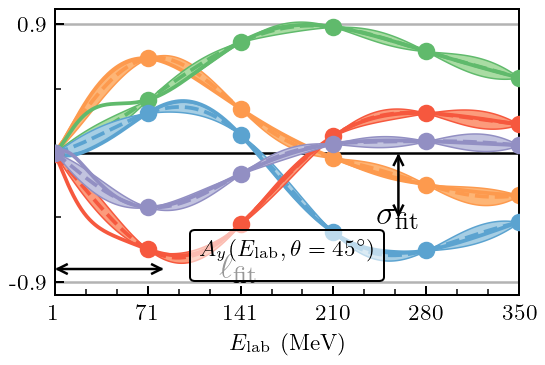

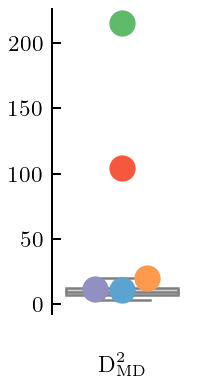

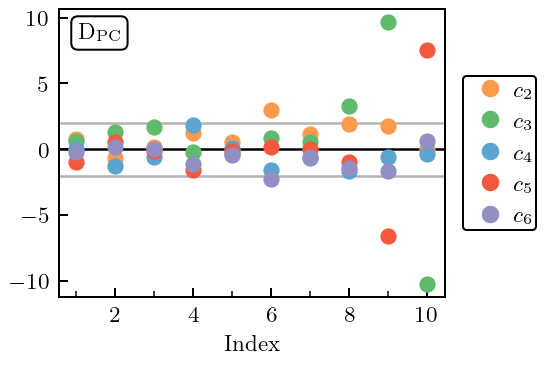

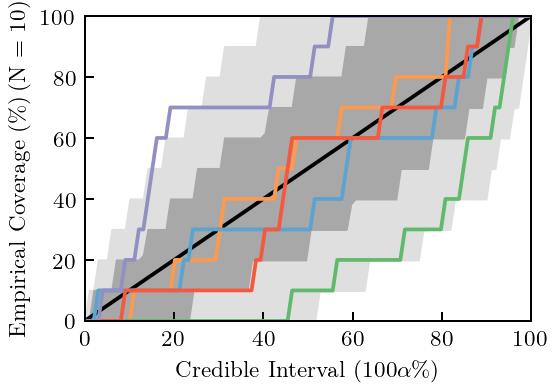

In [15]:
generate_diagnostics(
    nn_interaction="np",
    scale_scheme_bunch_array=[RKE500MeV],
    observable_input=["AY"],
    E_input_array=[],
    deg_input_array=[45],
    Q_param_method_array=["sum"],
    p_param_method_array=["Qofprel"],
    input_space_input=["Elab"],
    train_test_split_array=[Allenergysplit1],
    orders_excluded=[],
    orders_names_dict=None,
    orders_labels_dict=None,
    # length_scale_input=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleTlabInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleDegInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    fixed_sd=None,
    m_pi_eff=189,
    Lambdab=517,
    print_all_classes=False,
    savefile_type="png",
    plot_coeffs_bool=True,
    plot_md_bool=True,
    plot_pc_bool=True,
    plot_ci_bool=True,
    plot_pdf_bool=False,
    plot_trunc_bool=False,
    plot_plotzilla_bool=False,
    save_coeffs_bool=True,
    save_md_bool=True,
    save_pc_bool=True,
    save_ci_bool=True,
    save_pdf_bool=False,
    save_trunc_bool=False,
    save_plotzilla_bool=False,
    filename_addendum="_paper_0",
)

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:664: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  optima = np.array(optima)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


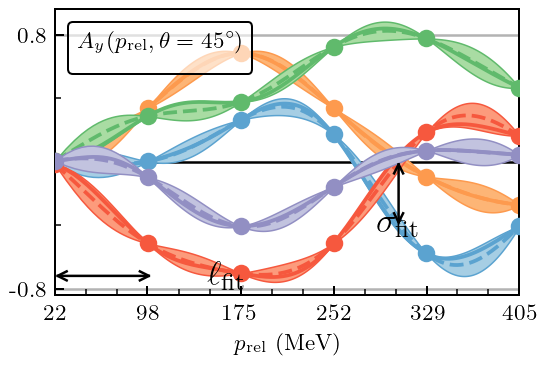

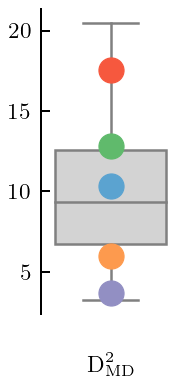

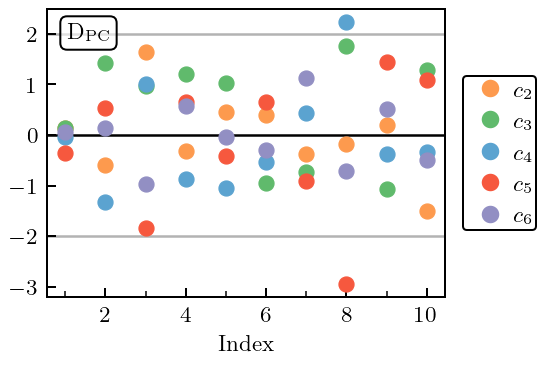

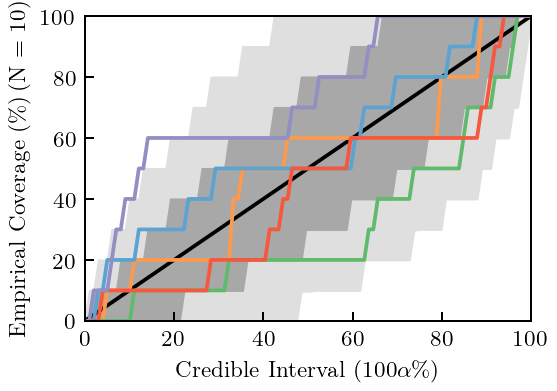

In [16]:
generate_diagnostics(
    nn_interaction="np",
    scale_scheme_bunch_array=[RKE500MeV],
    observable_input=["AY"],
    E_input_array=[],
    deg_input_array=[45],
    Q_param_method_array=["sum"],
    p_param_method_array=["Qofprel"],
    input_space_input=["prel"],
    train_test_split_array=[Allenergysplit1],
    orders_excluded=[],
    orders_names_dict=None,
    orders_labels_dict=None,
    # length_scale_input=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleTlabInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleDegInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    fixed_sd=None,
    m_pi_eff=141,
    Lambdab=477,
    print_all_classes=False,
    savefile_type="png",
    plot_coeffs_bool=True,
    plot_md_bool=True,
    plot_pc_bool=True,
    plot_ci_bool=True,
    plot_pdf_bool=False,
    plot_trunc_bool=False,
    plot_plotzilla_bool=False,
    save_coeffs_bool=True,
    save_md_bool=True,
    save_pc_bool=True,
    save_ci_bool=True,
    save_pdf_bool=False,
    save_trunc_bool=False,
    save_plotzilla_bool=False,
    filename_addendum="_paper_0",
)

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:664: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  optima = np.array(optima)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


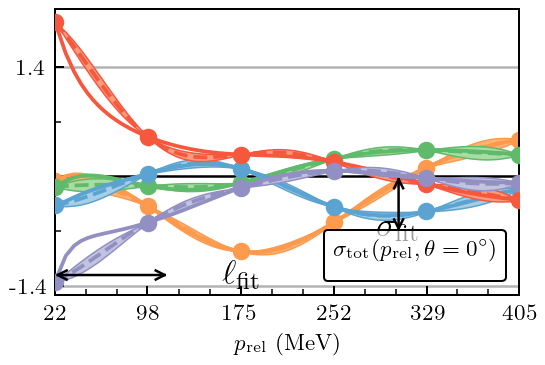

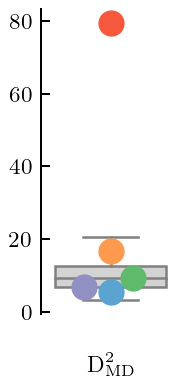

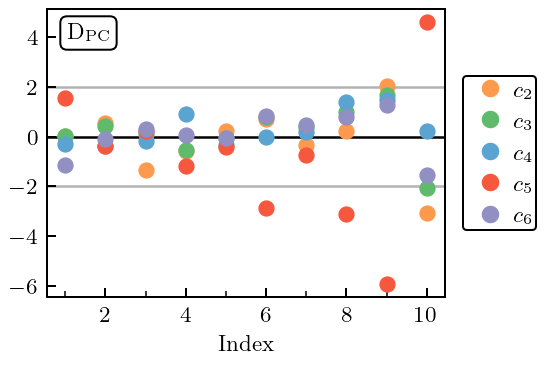

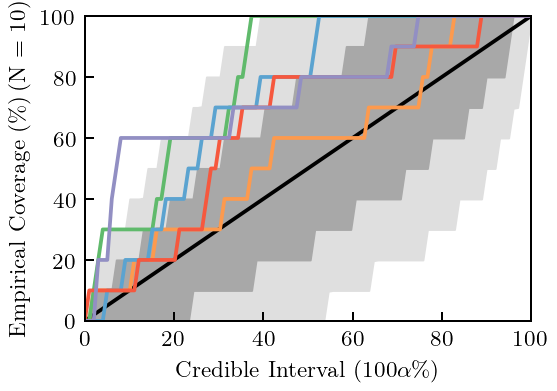

In [17]:
generate_diagnostics(
    nn_interaction="np",
    scale_scheme_bunch_array=[RKE500MeV],
    observable_input=["SGT"],
    E_input_array=[],
    deg_input_array=[],
    Q_param_method_array=["sum"],
    p_param_method_array=["Qofprel"],
    input_space_input=["prel"],
    train_test_split_array=[Allenergysplit1],
    orders_excluded=[],
    orders_names_dict=None,
    orders_labels_dict=None,
    # length_scale_input=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleTlabInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleDegInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    fixed_sd=None,
    m_pi_eff=141,
    Lambdab=477,
    print_all_classes=False,
    savefile_type="png",
    plot_coeffs_bool=True,
    plot_md_bool=True,
    plot_pc_bool=True,
    plot_ci_bool=True,
    plot_pdf_bool=False,
    plot_trunc_bool=False,
    plot_plotzilla_bool=False,
    save_coeffs_bool=True,
    save_md_bool=True,
    save_pc_bool=True,
    save_ci_bool=True,
    save_pdf_bool=False,
    save_trunc_bool=False,
    save_plotzilla_bool=False,
    filename_addendum="_paper_0",
)

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:664: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  optima = np.array(optima)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


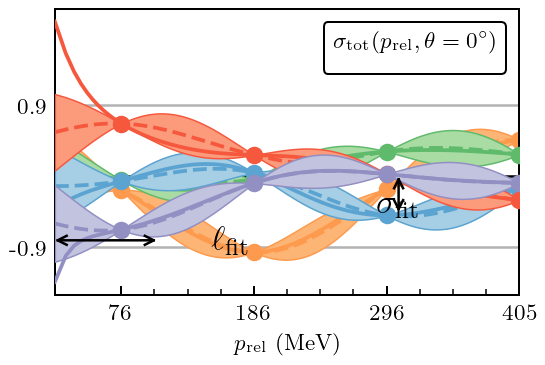

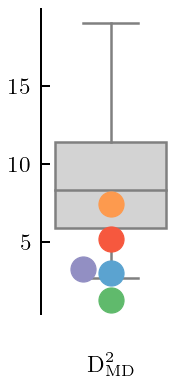

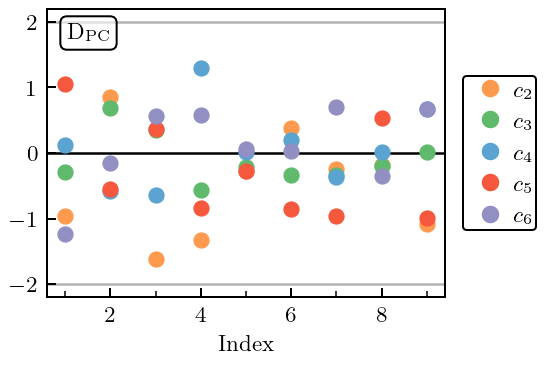

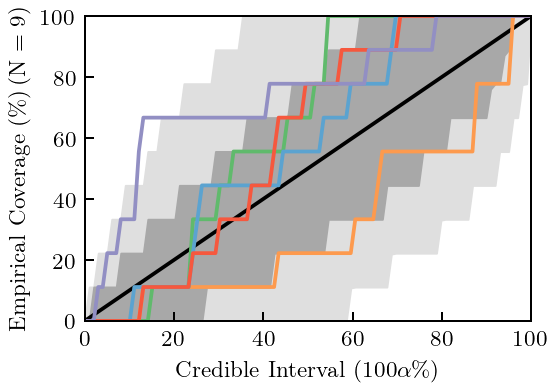

In [18]:
generate_diagnostics(
    nn_interaction="np",
    scale_scheme_bunch_array=[RKE500MeV],
    observable_input=["SGT"],
    E_input_array=[],
    deg_input_array=[],
    Q_param_method_array=["sum"],
    p_param_method_array=["Qofprel"],
    input_space_input=["prel"],
    train_test_split_array=[Nolowenergysplit1],
    orders_excluded=[],
    orders_names_dict=None,
    orders_labels_dict=None,
    # length_scale_input=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleTlabInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleDegInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    fixed_sd=None,
    m_pi_eff=141,
    Lambdab=477,
    print_all_classes=False,
    savefile_type="png",
    plot_coeffs_bool=True,
    plot_md_bool=True,
    plot_pc_bool=True,
    plot_ci_bool=True,
    plot_pdf_bool=False,
    plot_trunc_bool=False,
    plot_plotzilla_bool=False,
    save_coeffs_bool=True,
    save_md_bool=True,
    save_pc_bool=True,
    save_ci_bool=True,
    save_pdf_bool=False,
    save_trunc_bool=False,
    save_plotzilla_bool=False,
    filename_addendum="_paper_0",
)

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:664: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  optima = np.array(optima)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


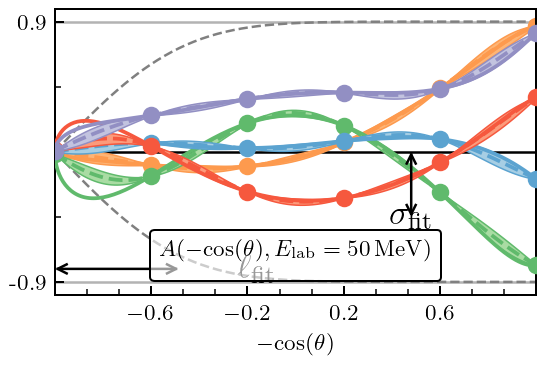

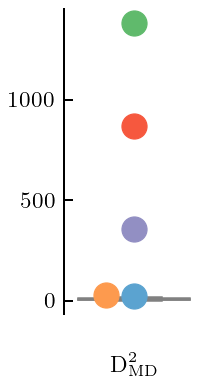

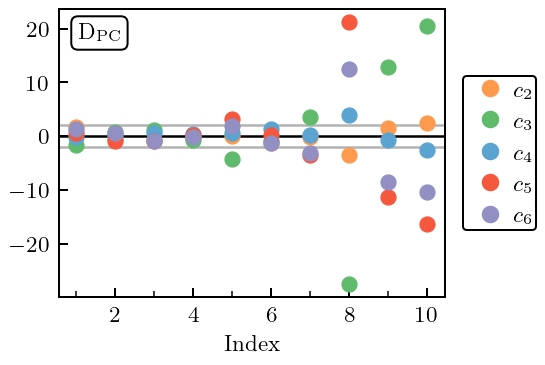

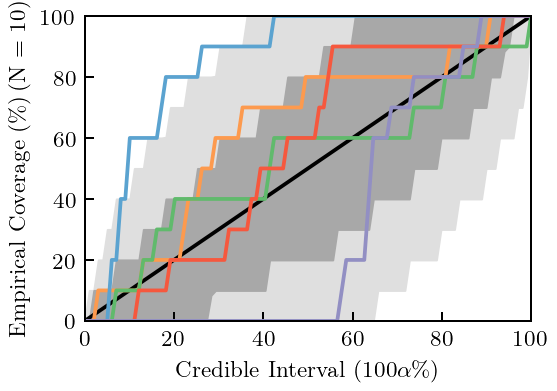

In [19]:
generate_diagnostics(
    nn_interaction="np",
    scale_scheme_bunch_array=[RKE500MeV],
    observable_input=["A"],
    E_input_array=[50],
    deg_input_array=[],
    Q_param_method_array=["sum"],
    p_param_method_array=["Qofprel"],
    input_space_input=["cos"],
    train_test_split_array=[Fullspaceanglessplit1],
    orders_excluded=[],
    orders_names_dict=None,
    orders_labels_dict=None,
    # length_scale_input=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleTlabInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleDegInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    fixed_sd=None,
    m_pi_eff=141,
    Lambdab=477,
    print_all_classes=False,
    savefile_type="png",
    plot_coeffs_bool=True,
    plot_md_bool=True,
    plot_pc_bool=True,
    plot_ci_bool=True,
    plot_pdf_bool=False,
    plot_trunc_bool=False,
    plot_plotzilla_bool=False,
    save_coeffs_bool=True,
    save_md_bool=True,
    save_pc_bool=True,
    save_ci_bool=True,
    save_pdf_bool=False,
    save_trunc_bool=False,
    save_plotzilla_bool=False,
    filename_addendum="_paper_0",
)

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:664: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  optima = np.array(optima)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


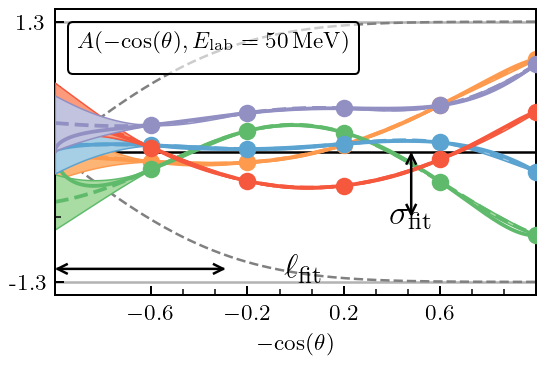

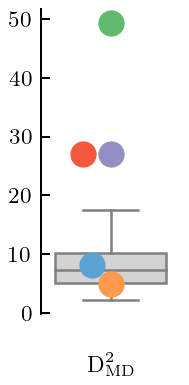

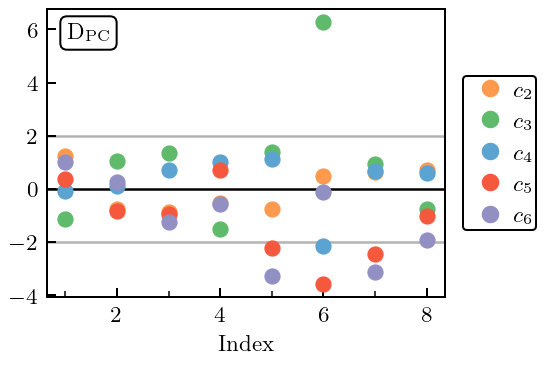

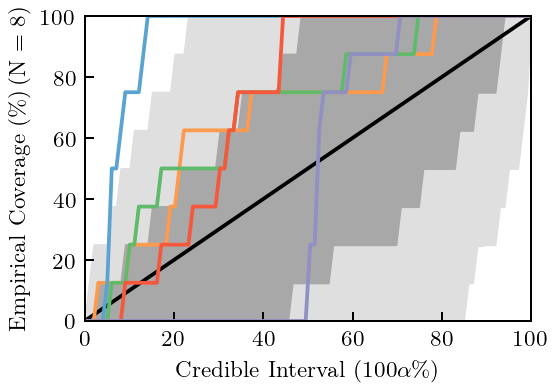

In [20]:
generate_diagnostics(
    nn_interaction="np",
    scale_scheme_bunch_array=[RKE500MeV],
    observable_input=["A"],
    E_input_array=[50],
    deg_input_array=[],
    Q_param_method_array=["sum"],
    p_param_method_array=["Qofprel"],
    input_space_input=["cos"],
    train_test_split_array=[Backwardanglessplit1],
    orders_excluded=[],
    orders_names_dict=None,
    orders_labels_dict=None,
    # length_scale_input=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleTlabInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleDegInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    fixed_sd=None,
    m_pi_eff=141,
    Lambdab=477,
    print_all_classes=False,
    savefile_type="png",
    plot_coeffs_bool=True,
    plot_md_bool=True,
    plot_pc_bool=True,
    plot_ci_bool=True,
    plot_pdf_bool=False,
    plot_trunc_bool=False,
    plot_plotzilla_bool=False,
    save_coeffs_bool=True,
    save_md_bool=True,
    save_pc_bool=True,
    save_ci_bool=True,
    save_pdf_bool=False,
    save_trunc_bool=False,
    save_plotzilla_bool=False,
    filename_addendum="_paper_0",
)

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:664: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  optima = np.array(optima)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


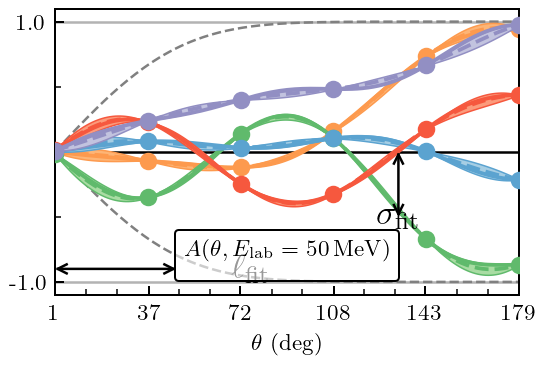

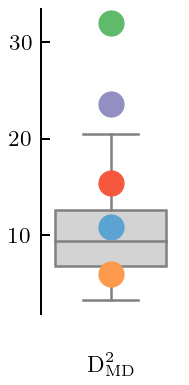

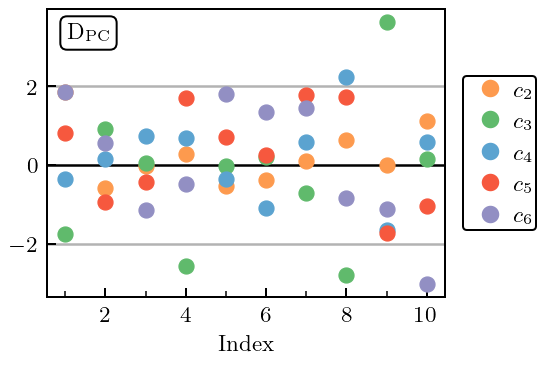

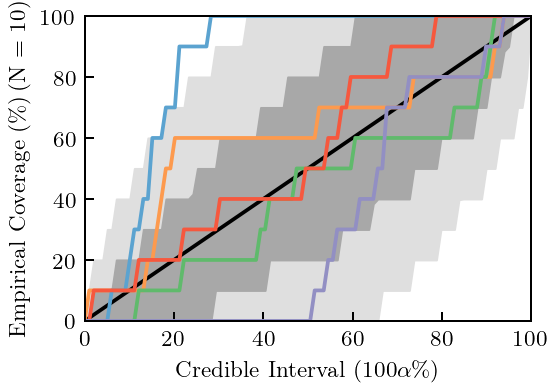

In [21]:
generate_diagnostics(
    nn_interaction="np",
    scale_scheme_bunch_array=[RKE500MeV],
    observable_input=["A"],
    E_input_array=[50],
    deg_input_array=[],
    Q_param_method_array=["sum"],
    p_param_method_array=["Qofprel"],
    input_space_input=["deg"],
    train_test_split_array=[Fullspaceanglessplit1],
    orders_excluded=[],
    orders_names_dict=None,
    orders_labels_dict=None,
    # length_scale_input=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleTlabInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleDegInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    fixed_sd=None,
    m_pi_eff=148,
    Lambdab=499,
    print_all_classes=False,
    savefile_type="png",
    plot_coeffs_bool=True,
    plot_md_bool=True,
    plot_pc_bool=True,
    plot_ci_bool=True,
    plot_pdf_bool=False,
    plot_trunc_bool=False,
    plot_plotzilla_bool=False,
    save_coeffs_bool=True,
    save_md_bool=True,
    save_pc_bool=True,
    save_ci_bool=True,
    save_pdf_bool=False,
    save_trunc_bool=False,
    save_plotzilla_bool=False,
    filename_addendum="_paper_0",
)

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:664: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  optima = np.array(optima)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


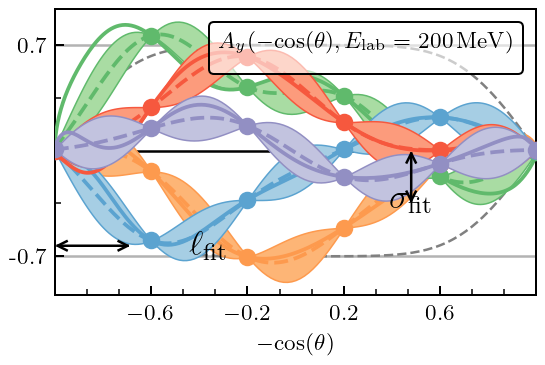

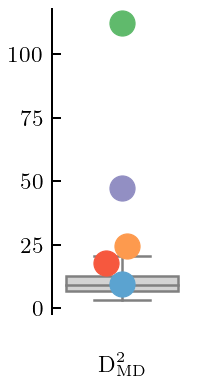

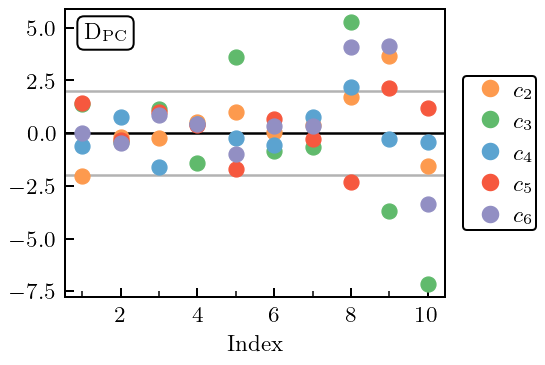

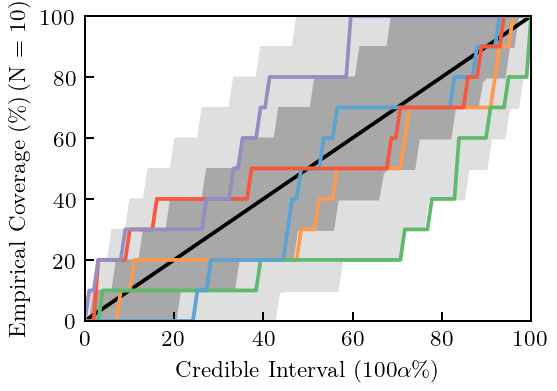

In [22]:
generate_diagnostics(
    nn_interaction="np",
    scale_scheme_bunch_array=[RKE500MeV],
    observable_input=["AY"],
    E_input_array=[200],
    deg_input_array=[],
    Q_param_method_array=["sum"],
    p_param_method_array=["Qofprel"],
    input_space_input=["cos"],
    train_test_split_array=[Fullspaceanglessplit1],
    orders_excluded=[],
    orders_names_dict=None,
    orders_labels_dict=None,
    # length_scale_input=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleTlabInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleDegInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    fixed_sd=None,
    m_pi_eff=141,
    Lambdab=477,
    print_all_classes=False,
    savefile_type="png",
    plot_coeffs_bool=True,
    plot_md_bool=True,
    plot_pc_bool=True,
    plot_ci_bool=True,
    plot_pdf_bool=False,
    plot_trunc_bool=False,
    plot_plotzilla_bool=False,
    save_coeffs_bool=True,
    save_md_bool=True,
    save_pc_bool=True,
    save_ci_bool=True,
    save_pdf_bool=False,
    save_trunc_bool=False,
    save_plotzilla_bool=False,
    filename_addendum="_paper_0",
)

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:664: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  optima = np.array(optima)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


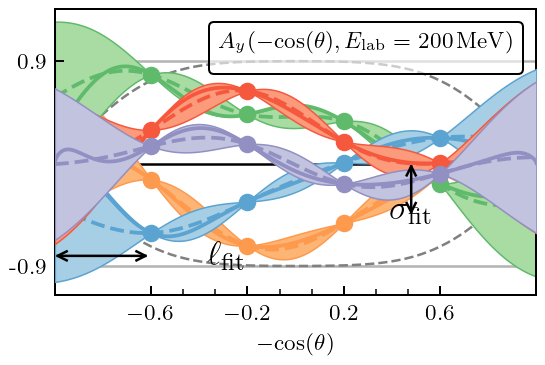

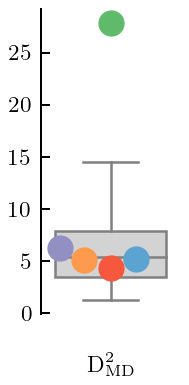

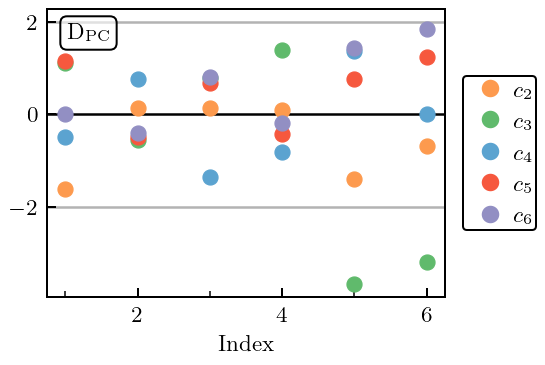

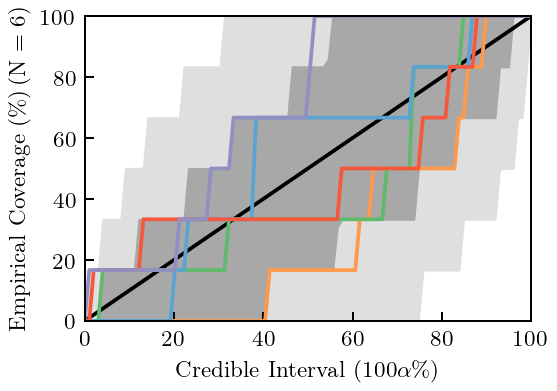

In [23]:
generate_diagnostics(
    nn_interaction="np",
    scale_scheme_bunch_array=[RKE500MeV],
    observable_input=["AY"],
    E_input_array=[200],
    deg_input_array=[],
    Q_param_method_array=["sum"],
    p_param_method_array=["Qofprel"],
    input_space_input=["cos"],
    train_test_split_array=[Middleanglessplit1],
    orders_excluded=[],
    orders_names_dict=None,
    orders_labels_dict=None,
    # length_scale_input=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleTlabInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleDegInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    fixed_sd=None,
    m_pi_eff=141,
    Lambdab=477,
    print_all_classes=False,
    savefile_type="png",
    plot_coeffs_bool=True,
    plot_md_bool=True,
    plot_pc_bool=True,
    plot_ci_bool=True,
    plot_pdf_bool=False,
    plot_trunc_bool=False,
    plot_plotzilla_bool=False,
    save_coeffs_bool=True,
    save_md_bool=True,
    save_pc_bool=True,
    save_ci_bool=True,
    save_pdf_bool=False,
    save_trunc_bool=False,
    save_plotzilla_bool=False,
    filename_addendum="_paper_0",
)

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:664: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  optima = np.array(optima)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


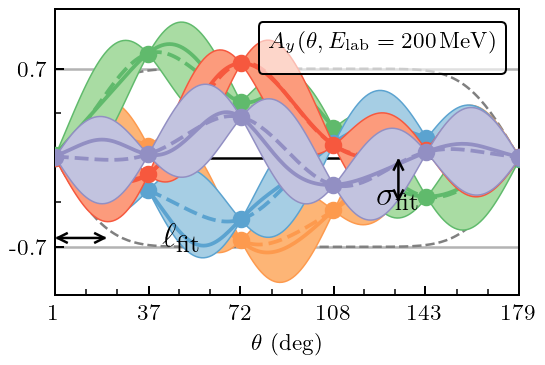

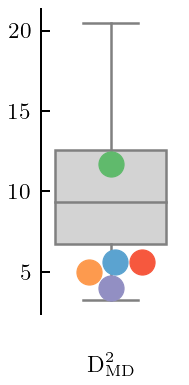

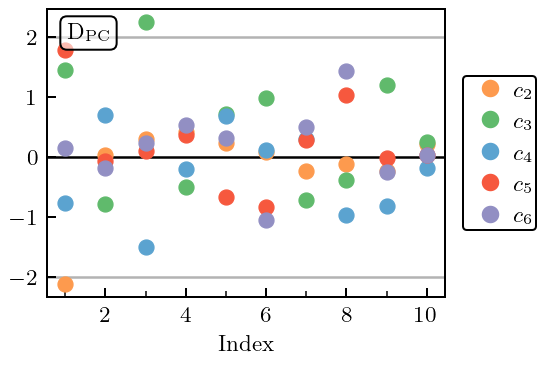

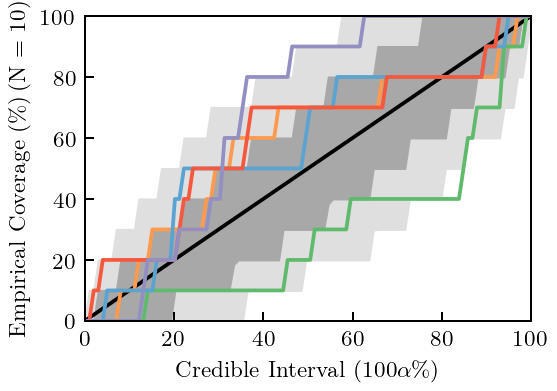

In [24]:
generate_diagnostics(
    nn_interaction="np",
    scale_scheme_bunch_array=[RKE500MeV],
    observable_input=["AY"],
    E_input_array=[200],
    deg_input_array=[],
    Q_param_method_array=["sum"],
    p_param_method_array=["Qofprel"],
    input_space_input=["deg"],
    train_test_split_array=[Fullspaceanglessplit1],
    orders_excluded=[],
    orders_names_dict=None,
    orders_labels_dict=None,
    # length_scale_input=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleTlabInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleDegInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    fixed_sd=None,
    m_pi_eff=148,
    Lambdab=499,
    print_all_classes=False,
    savefile_type="png",
    plot_coeffs_bool=True,
    plot_md_bool=True,
    plot_pc_bool=True,
    plot_ci_bool=True,
    plot_pdf_bool=False,
    plot_trunc_bool=False,
    plot_plotzilla_bool=False,
    save_coeffs_bool=True,
    save_md_bool=True,
    save_pc_bool=True,
    save_ci_bool=True,
    save_pdf_bool=False,
    save_trunc_bool=False,
    save_plotzilla_bool=False,
    filename_addendum="_paper_0",
)

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:664: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  optima = np.array(optima)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


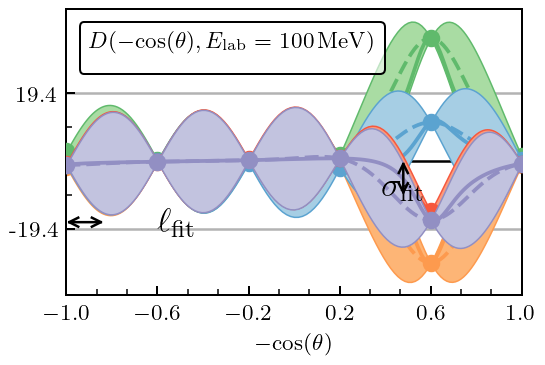

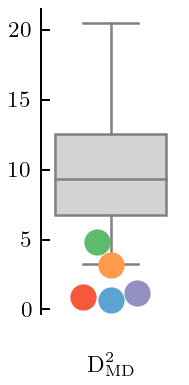

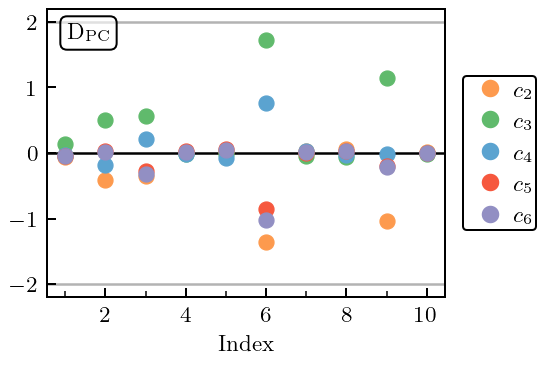

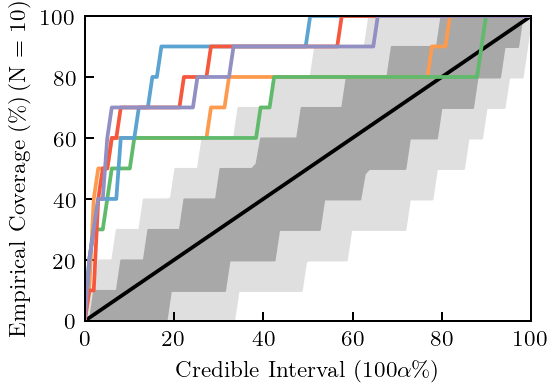

In [25]:
# needs to be the "yref != 1" D
generate_diagnostics(
    nn_interaction="np",
    scale_scheme_bunch_array=[RKE500MeV],
    observable_input=["D_dimensionful"],
    E_input_array=[100],
    deg_input_array=[],
    Q_param_method_array=["sum"],
    p_param_method_array=["Qofprel"],
    input_space_input=["cos"],
    train_test_split_array=[Fullspaceanglessplit1],
    orders_excluded=[],
    orders_names_dict=None,
    orders_labels_dict=None,
    # length_scale_input=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleTlabInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleDegInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    fixed_sd=None,
    m_pi_eff=141,
    Lambdab=477,
    print_all_classes=False,
    savefile_type="png",
    plot_coeffs_bool=True,
    plot_md_bool=True,
    plot_pc_bool=True,
    plot_ci_bool=True,
    plot_pdf_bool=False,
    plot_trunc_bool=False,
    plot_plotzilla_bool=False,
    save_coeffs_bool=True,
    save_md_bool=True,
    save_pc_bool=True,
    save_ci_bool=True,
    save_pdf_bool=False,
    save_trunc_bool=False,
    save_plotzilla_bool=False,
    filename_addendum="_paper_0_badref",
)

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:664: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  optima = np.array(optima)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


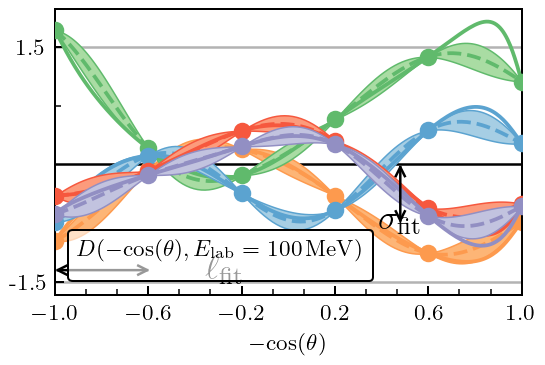

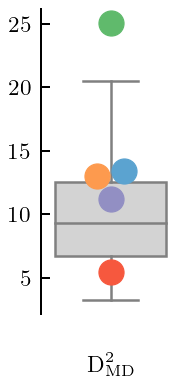

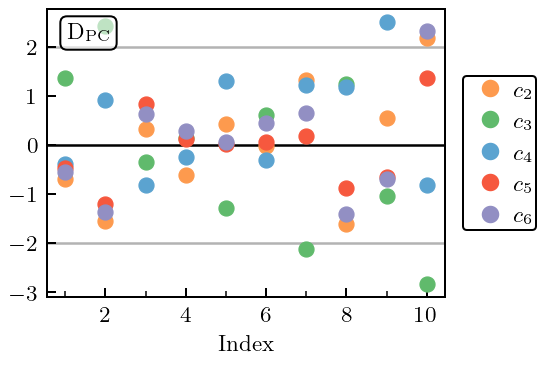

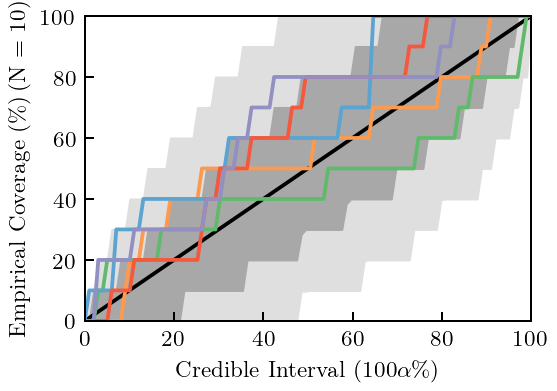

In [26]:
generate_diagnostics(
    nn_interaction="np",
    scale_scheme_bunch_array=[RKE500MeV],
    observable_input=["D"],
    E_input_array=[100],
    deg_input_array=[],
    Q_param_method_array=["sum"],
    p_param_method_array=["Qofprel"],
    input_space_input=["cos"],
    train_test_split_array=[Fullspaceanglessplit1],
    orders_excluded=[],
    orders_names_dict=None,
    orders_labels_dict=None,
    # length_scale_input=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleTlabInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleDegInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    fixed_sd=None,
    m_pi_eff=141,
    Lambdab=477,
    print_all_classes=False,
    savefile_type="png",
    plot_coeffs_bool=True,
    plot_md_bool=True,
    plot_pc_bool=True,
    plot_ci_bool=True,
    plot_pdf_bool=False,
    plot_trunc_bool=False,
    plot_plotzilla_bool=False,
    save_coeffs_bool=True,
    save_md_bool=True,
    save_pc_bool=True,
    save_ci_bool=True,
    save_pdf_bool=False,
    save_trunc_bool=False,
    save_plotzilla_bool=False,
    filename_addendum="_paper_0",
)

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:664: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  optima = np.array(optima)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


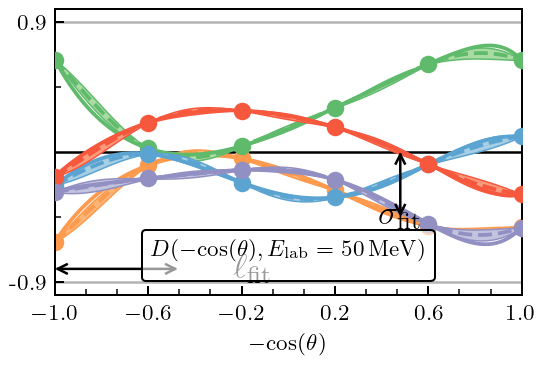

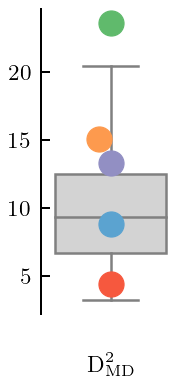

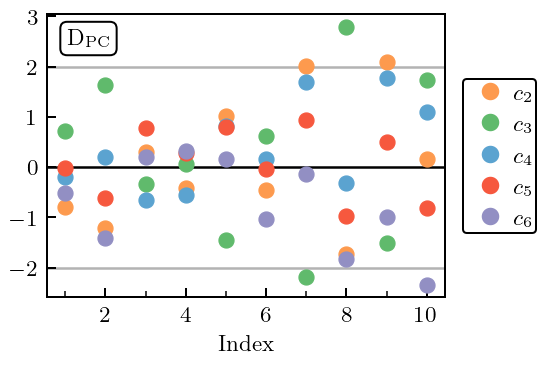

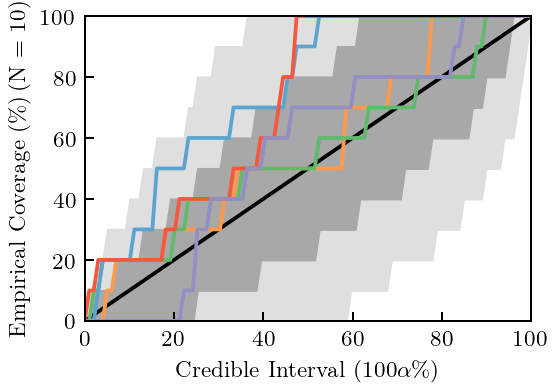

In [27]:
generate_diagnostics(
    nn_interaction="np",
    scale_scheme_bunch_array=[RKE500MeV],
    observable_input=["D"],
    E_input_array=[50],
    deg_input_array=[],
    Q_param_method_array=["sum"],
    p_param_method_array=["Qofprel"],
    input_space_input=["cos"],
    train_test_split_array=[Fullspaceanglessplit1],
    orders_excluded=[],
    orders_names_dict=None,
    orders_labels_dict=None,
    # length_scale_input=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleTlabInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleDegInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    fixed_sd=None,
    m_pi_eff=141,
    Lambdab=477,
    print_all_classes=False,
    savefile_type="png",
    plot_coeffs_bool=True,
    plot_md_bool=True,
    plot_pc_bool=True,
    plot_ci_bool=True,
    plot_pdf_bool=False,
    plot_trunc_bool=False,
    plot_plotzilla_bool=False,
    save_coeffs_bool=True,
    save_md_bool=True,
    save_pc_bool=True,
    save_ci_bool=True,
    save_pdf_bool=False,
    save_trunc_bool=False,
    save_plotzilla_bool=False,
    filename_addendum="_paper_0",
)

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:664: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  optima = np.array(optima)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


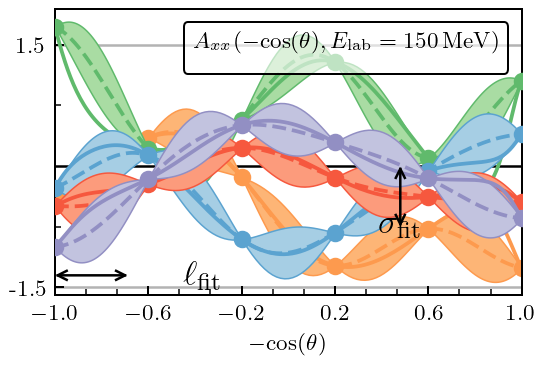

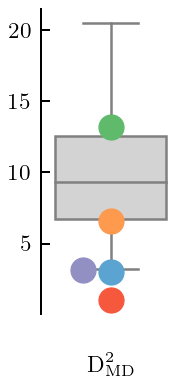

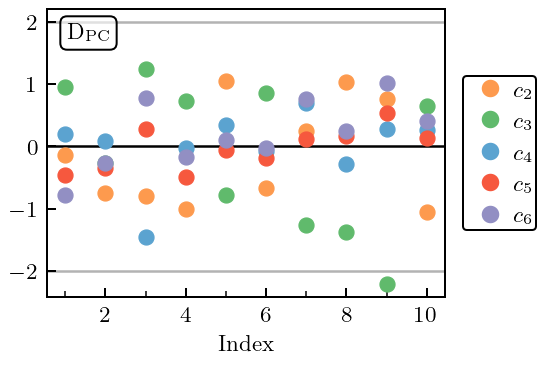

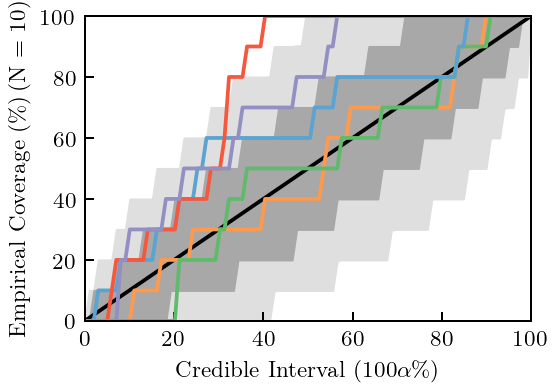

In [28]:
generate_diagnostics(
    nn_interaction="np",
    scale_scheme_bunch_array=[RKE500MeV],
    observable_input=["AXX"],
    E_input_array=[150],
    deg_input_array=[],
    Q_param_method_array=["sum"],
    p_param_method_array=["Qofprel"],
    input_space_input=["cos"],
    train_test_split_array=[Fullspaceanglessplit1],
    orders_excluded=[],
    orders_names_dict=None,
    orders_labels_dict=None,
    # length_scale_input=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleTlabInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleDegInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    fixed_sd=None,
    m_pi_eff=141,
    Lambdab=477,
    print_all_classes=False,
    savefile_type="png",
    plot_coeffs_bool=True,
    plot_md_bool=True,
    plot_pc_bool=True,
    plot_ci_bool=True,
    plot_pdf_bool=False,
    plot_trunc_bool=False,
    plot_plotzilla_bool=False,
    save_coeffs_bool=True,
    save_md_bool=True,
    save_pc_bool=True,
    save_ci_bool=True,
    save_pdf_bool=False,
    save_trunc_bool=False,
    save_plotzilla_bool=False,
    filename_addendum="_paper_0",
)

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:664: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  optima = np.array(optima)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


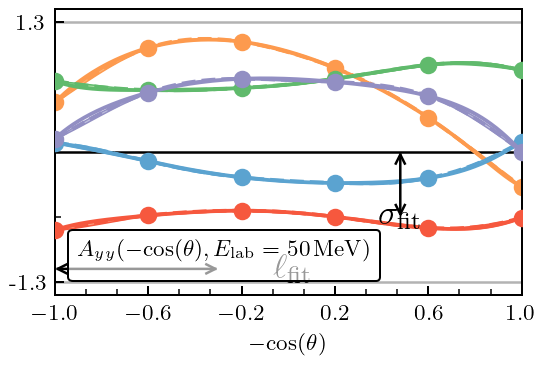

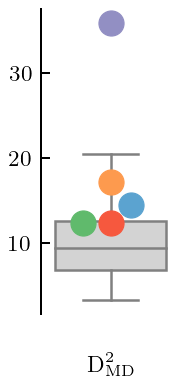

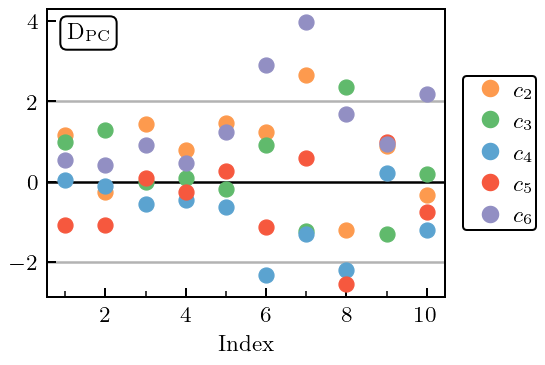

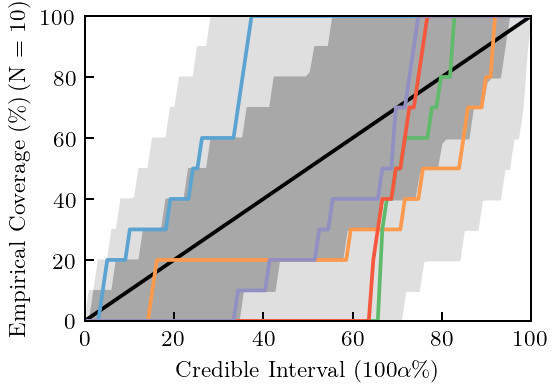

In [29]:
generate_diagnostics(
    nn_interaction="np",
    scale_scheme_bunch_array=[RKE500MeV],
    observable_input=["AYY"],
    E_input_array=[50],
    deg_input_array=[],
    Q_param_method_array=["sum"],
    p_param_method_array=["Qofprel"],
    input_space_input=["cos"],
    train_test_split_array=[Fullspaceanglessplit1],
    orders_excluded=[],
    orders_names_dict=None,
    orders_labels_dict=None,
    # length_scale_input=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleTlabInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleDegInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    fixed_sd=None,
    m_pi_eff=141,
    Lambdab=477,
    print_all_classes=False,
    savefile_type="png",
    plot_coeffs_bool=True,
    plot_md_bool=True,
    plot_pc_bool=True,
    plot_ci_bool=True,
    plot_pdf_bool=False,
    plot_trunc_bool=False,
    plot_plotzilla_bool=False,
    save_coeffs_bool=True,
    save_md_bool=True,
    save_pc_bool=True,
    save_ci_bool=True,
    save_pdf_bool=False,
    save_trunc_bool=False,
    save_plotzilla_bool=False,
    filename_addendum="_paper_0",
)

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:664: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  optima = np.array(optima)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


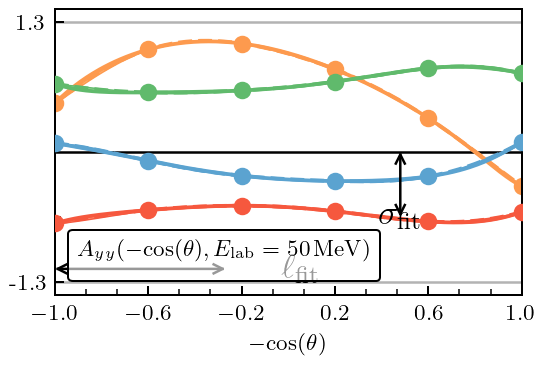

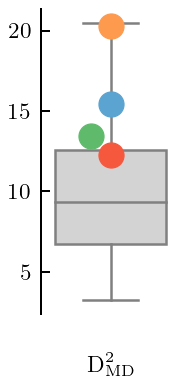

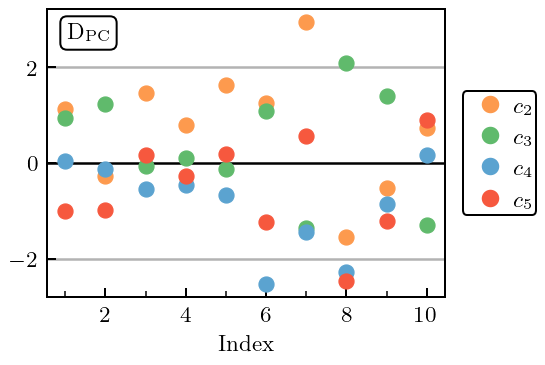

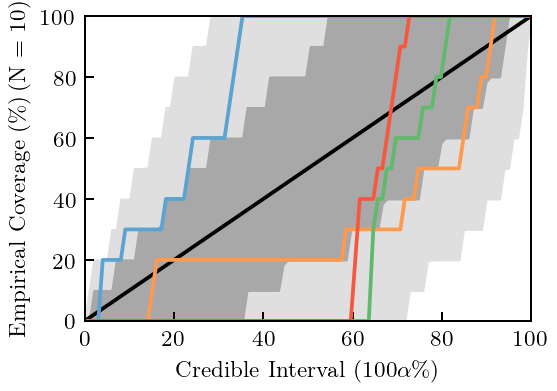

In [30]:
generate_diagnostics(
    nn_interaction="np",
    scale_scheme_bunch_array=[RKE500MeV],
    observable_input=["AYY"],
    E_input_array=[50],
    deg_input_array=[],
    Q_param_method_array=["sum"],
    p_param_method_array=["Qofprel"],
    input_space_input=["cos"],
    train_test_split_array=[Fullspaceanglessplit1],
    orders_excluded=[6],
    orders_names_dict=None,
    orders_labels_dict=None,
    # length_scale_input=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleTlabInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleDegInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    fixed_sd=None,
    m_pi_eff=123,
    Lambdab=449,
    print_all_classes=False,
    savefile_type="png",
    plot_coeffs_bool=True,
    plot_md_bool=True,
    plot_pc_bool=True,
    plot_ci_bool=True,
    plot_pdf_bool=False,
    plot_trunc_bool=False,
    plot_plotzilla_bool=False,
    save_coeffs_bool=True,
    save_md_bool=True,
    save_pc_bool=True,
    save_ci_bool=True,
    save_pdf_bool=False,
    save_trunc_bool=False,
    save_plotzilla_bool=False,
    filename_addendum="_paper_0_noc6",
)